In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = np.loadtxt("data/ex2data1.txt",delimiter=',')
# m = data.shape[0]
X = np.hstack((np.ones((m,1)),data[:,:2]))
y = data[:,-1:]

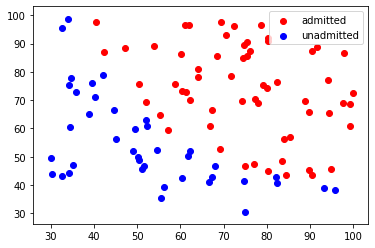

In [81]:
def plotData(X,y):
    
    plt.scatter(X[:,1:2][y == 1],X[:,2:3][y == 1],c='r',label='admitted')
    plt.scatter(X[:,1:2][y == 0],X[:,2:3][y == 0],c='b',label='unadmitted')
    plt.legend()
    
    return


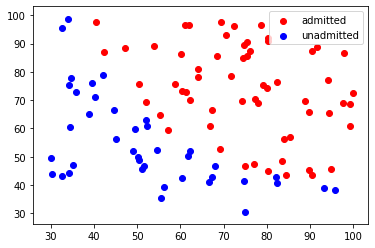

In [82]:
plotData(X,y)

In [45]:
b = np.array([1,2,3])
c = np.reshape(b,(3,1))
c

array([[1],
       [2],
       [3]])

In [46]:
a @ b

array([6., 6., 6., 6.])

In [47]:
a @ c

array([[6.],
       [6.],
       [6.],
       [6.]])